# Ejercicio 1: Estimacion ecuación lineal con dos parámetros
$y=\omega_1 · X_1 + \omega_2 · X_2 + cte.$



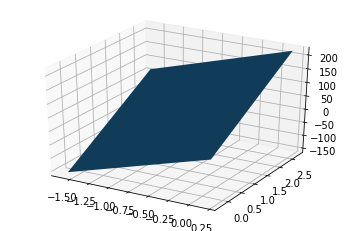

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter


cte = 2
x,y, coef= datasets.make_regression(random_state=42,n_features=2,coef=True,bias=cte)
omega = coef[0]
omega2 = coef[1]


#Imprimimos

fig = plt.figure()
ax = fig.gca(projection='3d')

#Para el 3D hace falta un grid
X, Y = np.meshgrid(x[0],x[1])
Z = X*omega + Y*omega2 + cte

# Plot the surface.
ax.plot_surface(X, Y, Z)


plt.show()

# Ejercicio 2: CIFAR 10

Using TensorFlow backend.


170500096/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


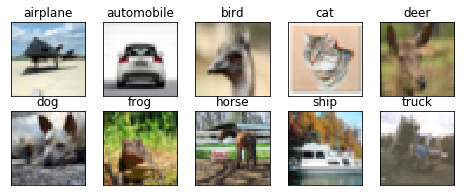

(32, 32, 3)


In [2]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
num_classes=10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (0, 1, 2))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# De clase a one hot enconder.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


input_shape= x_train.shape[1:]
print(input_shape)